In [758]:
import numpy as np
import matplotlib.pyplot as plt
import get_data as gd
import Preprocessing as p
import SimpleITK as sitk
import seaborn as sns
from scipy import stats, signal
import statistics
import ImageViewer as iv
import pandas as pd

%matplotlib inline

In [659]:
def create_dataframe(folder_path, image_prefix, mask_suffix):
    """
    Returns a dataframe with information of the images in the folder_path
    
    folder_path: path to folder with images
    image_prefix: prefix of image files
    mask_suffix: suffix of mask files
    """
    patientPaths, patientNames, imagePaths, maskPaths = gd.get_paths(folder_path, image_prefix, mask_suffix)
    df = p.dataframe(patientPaths, patientNames, imagePaths, maskPaths)
    df = p.dimensions(df)
    return df

In [660]:
def intensities(df):
    """
    Returns a list of arrays containing the pixel intensities of the images in the dataframe
    
    df: dataframe with image paths
    """
    
    pixel_values = []
    img_sizes = []
    
    for path in df['imagePaths']:
        print(path)
        image = sitk.ReadImage(path)
        image_array = sitk.GetArrayFromImage(image)
        img_sizes.append(np.shape(image_array))
        pixel_values.append(image_array.flatten())
    
    return pixel_values, img_sizes

In [661]:
def pixel_distribution(pixel_list):
    """
    Plots the distribution of pixels in the images 
    """
    fig, ax = plt.subplots(figsize=(11,8))
    for i in range(len(pixel_list)):
        sns.kdeplot(data=pixel_list[i], ax=ax)
    plt.xlabel('Pixel intensity')
    plt.show()

In [662]:
Oxy = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped', 'T2', 'an.nii')

In [673]:
Oxy_train = Oxy[:10]
pixel_values_Oxy, image_sizes_Oxy = intensities(Oxy_train)

/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_103_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_106_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_108_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_110_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_111_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_113_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_115_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_116_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_118_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_120_PRE/T2.nii


In [691]:
print(len(pixel_values_Oxy))

10


In [665]:
LARC = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped', 'image', 'label.nii')

In [747]:
LARC.head(17)

,patientPaths,ID,imagePaths,maskPaths,xDimension,yDimension,zDimension,xVoxelDimension,yVoxelDimension,zVoxelDimension
0,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-003,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,20,0.390625,0.390625,5
1,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-004,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,35,0.390625,0.390625,5
2,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-005,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,38,0.390625,0.390625,5
3,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-006,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,38,0.390625,0.390625,5
4,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-007,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,35,0.390625,0.390625,5
5,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-008,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,35,0.390625,0.390625,5
6,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-009,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,38,0.390625,0.390625,5
7,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-001,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,352,352,18,0.390625,0.390625,5
8,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-011,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,256,256,21,0.9375,0.9375,6
9,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,LARC-RRP-013,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropp...,256,256,22,0.9375,0.9375,5


In [778]:
LARC_train = LARC[:15]
#LARC_train = LARC_train.append(LARC[13:15])
pixel_values_LARC, image_sizes_LARC = intensities(LARC_train)

/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-003/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-004/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-005/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-006/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-007/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-008/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-009/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-001/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-011/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-013/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-014/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-015/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-016/image.nii
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-017/im

In [783]:
pixel_values_combined = pixel_values_LARC + pixel_values_Oxy

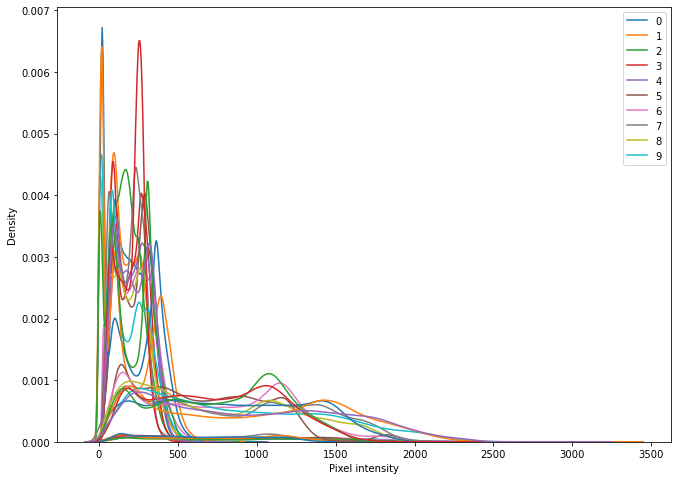

In [784]:
pixel_distribution(pixel_values_combined)

## Training

In [669]:
def landmarks(pixel_list, min_percentile, max_percentile):
    """
    Returns the minimum and maximum percentile values (p_1j, p_2j) for image j,
    and the position of the bimodal node for image j.
    """
    min_percentiles = []
    max_percentiles = []
    bimodals_index = []
    bimodals = []
    max_intensities = []
    min_intensities = []

    
    plt.figure(figsize=(11,8))
    plt.xlabel('Pixel intensity')
    
    for i in range(len(pixel_list)):
        #Calculate percentiles for the pixels in the image
        min_percentiles.append(np.percentile(pixel_list[i], min_percentile))
        max_percentiles.append(np.percentile(pixel_list[i], max_percentile))
        
        max_intensities.append(max(pixel_list[i]))
        min_intensities.append(min(pixel_list[i]))
        
        #Find the bimodal point in the distribution
        max_y = []
        x,y = sns.kdeplot(pixel_list[i]).get_lines()[i].get_data() #Creates a list of x- and y-values used to plot the pixel distribution
        max_index = np.ndarray.tolist(signal.argrelextrema(y, np.greater)[0]) #Finds indexes of the maximum points in the distribution
        for j in max_index:
            max_y.append(y[j]) #Adds the maximum value to a list
        max_y.sort() #Sorts the maximum values

        #Check that the second highest point is after the highest point of the distribution, in order
        #to add the correct bimodal point.
        if (np.where(y==max_y[-2])[0][0] < np.where(y==max_y[-1])[0][0]):
            bimodal_j = np.ndarray.tolist(x[np.where(y==max_y[-1])])
            bimodals.append(max_y[-1])
        else:
            bimodal_j = np.ndarray.tolist(x[np.where(y==max_y[-2])])
            bimodals.append(max_y[-2])
            
        bimodals_index.append(bimodal_j[0])
    
    #Visualize and plot the pixel distributions together with the bimodal point.
    for k in range(len(bimodals_index)):
        plt.plot(bimodals_index[k], bimodals[k], '*', markersize=10)
        
    return min_percentiles, max_percentiles, bimodals_index, max_intensities, min_intensities

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1928.8669108669073, 1933.4915750915723, 1983.3238095238091, 1882.8483516483511, 2316.26471306471, 1905.1516483516455, 2282.079120879119, 1652.1728937728913, 1714.4263736263738, 2369.3606837606812]
[377.70752382370614, 1142.1656696357372, 438.2465547463458, 1088.2126391846887, 1332.1247798170375, 1417.494439827195, 1420.852993813497, 1082.0312039738133, 1062.2507339022695, 1307.7373959235913]


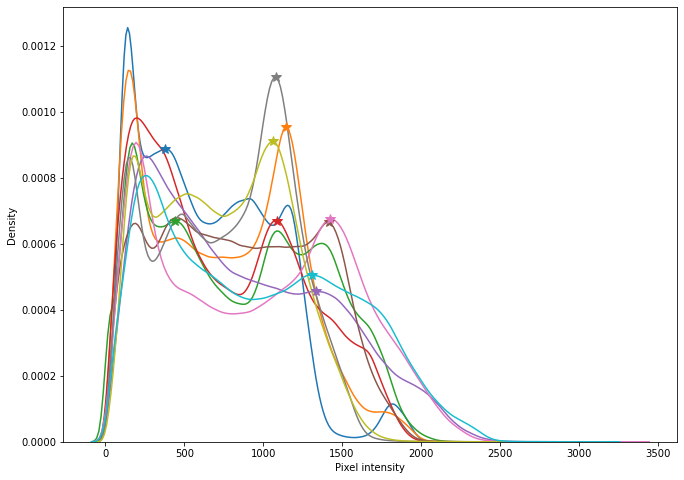

In [676]:
min_p, max_p, bimodals, max_intensities, min_intensities = landmarks(pixel_values_Oxy, 0, 99.8)
print(min_p)
print(max_p)
print(bimodals)

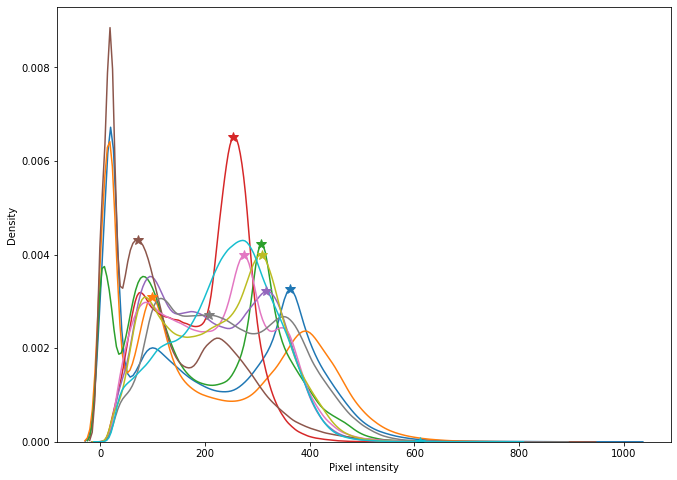

In [710]:
#pixel_values_combined = pixel_values_LARC + pixel_values_Oxy
#print(pixel_values_combined)
#print(pixel_values_Oxy)
min_p_comb, max_p_comb, bimodals_comb, max_intensities_comb, min_intensities_comb = landmarks(pixel_values_LARC, 0, 99.8)

In [711]:
def check_s_values(bimodals, min_percentiles, max_percentiles, s1, s2):
    """
    Checks that the choice of s-values fullfills Theorem 2 in the following articel:
    chrome-extension://dagcmkpagjlhakfdhnbomgmjdpkdklff/enhanced-reader.html?pdf=https%3A%2F%2Fbrxt.mendeley.com%2Fdocument%2Fcontent%2F3875ee52-3498-3bf0-84c7-94b63dac20f5
    """
    
    a = []
    b = []
    
    
    for i in range(len(bimodals)):
        if (bimodals[i] > min_percentiles[i] and bimodals[i] < max_percentiles[i]):
            a.append(bimodals[i]-min_percentiles[i])
            b.append(max_percentiles[i]-bimodals[i])
        else:
            print('Condition not fulfilled')
    
    min_a = min(a)
    max_a = max(a)
    min_b = min(b)
    max_b = max(b)
    
    print(min_a)
    print(max_a)
    print(min_b)
    print(max_a)
    
    
    condition = (max_a + max_b) * max(max_a/min_a, max_b/min_b)
    
    print('Condition which must be fullfilled:', condition)
    
    if (s2 - s1) >= condition:
        print('Condition fullfilled')
    else:
        print('Choose new values for s_1 and s_2')
    
    

In [713]:
s1 = 1
s2 = 11200
check_s_values(bimodals, min_p, max_p, s1, s2)

377.70752382370614
1420.852993813497
487.6572085244504
1420.852993813497
Condition which must be fullfilled: 11180.059762224899
Condition fullfilled


In [714]:
def map_percentiles(bimodals, min_percentiles, max_percentiles, s1, s2):
    """
    
    """
    new_bimodals = []
    
    for j in range(len(bimodals)):
        new_bimodal = s1 + ((bimodals[j] - min_percentiles[j])/(max_percentiles[j] - min_percentiles[j]))*(s2-s1)
        new_bimodals.append(new_bimodal)
    
    new_bimodal_mean = round(statistics.mean(new_bimodals))
    
    return new_bimodal_mean
    
    

In [715]:
new_bimodal = map_percentiles(bimodals, min_p, max_p, s1, s2)
print(new_bimodal)

5997


## Transformation

In [716]:
Oxy_trans = Oxy[10:20]
Oxy_trans

,patientPaths,ID,imagePaths,maskPaths,xDimension,yDimension,zDimension,xVoxelDimension,yVoxelDimension,zVoxelDimension
10,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_121_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
11,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_122_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
12,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_123_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
13,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_124_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
14,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_125_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
15,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_126_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.342208,0.342208,2.75
16,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_127_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,24,0.351562,0.351562,2.75
17,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_128_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,26,0.351562,0.351562,2.75
18,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_130_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,22,0.351562,0.351562,2.75
19,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,Oxytarget_131_PRE,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,/Volumes/LaCie/MasterThesis_Ingvild/Oxy_croppe...,352,352,28,0.351562,0.351562,3.2


In [717]:
pixel_values_trans, img_sizes_trans = intensities(Oxy_trans)

/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_121_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_122_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_123_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_124_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_125_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_126_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_127_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_128_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_130_PRE/T2.nii
/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped/Oxytarget_131_PRE/T2.nii


In [718]:
print(img_sizes_trans)

[(26, 352, 352), (26, 352, 352), (26, 352, 352), (26, 352, 352), (26, 352, 352), (26, 352, 352), (24, 352, 352), (26, 352, 352), (22, 352, 352), (28, 352, 352)]


In [719]:
print(pixel_values_trans[0][10])

218.9035409035406


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2337.117216117213, 1932.2295482295472, 2775.3289377289375, 1901.1526251526252, 1933.5882783882762, 1863.7396825396818, 1856.687179487178, 2008.5274725274603, 1990.395604395594, 2676.6285714285623]
[643.1220041957591, 1356.8754190169323, 1761.031699143812, 1458.5356887745118, 1549.1835320013256, 1294.5403217952764, 1470.5269761247898, 1628.2864329871293, 1455.840509715315, 1601.6026318320864]
[3199.8547008546966, 2699.438339438338, 3618.372405372405, 2841.929181929182, 2611.4554334554305, 2496.230525030524, 2523.808547008545, 2958.013186813169, 2497.0417582417454, 3088.417582417572]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


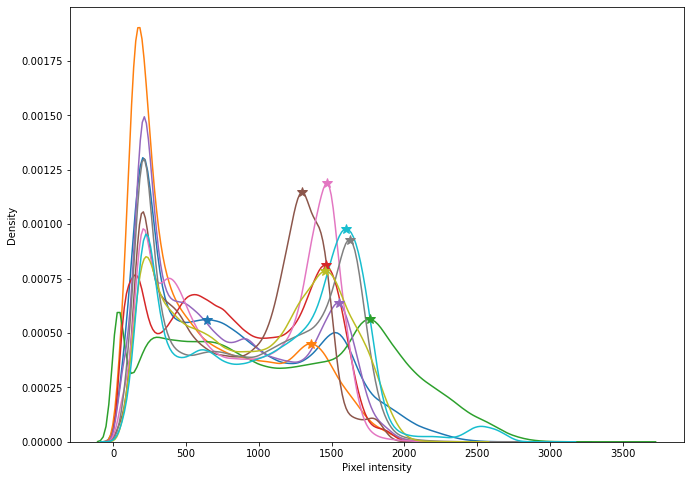

In [720]:
min_p_trans, max_p_trans, bimodals_trans, max_i, min_i = landmarks(pixel_values_trans, 0, 99.8)
print(min_p_trans)
print(max_p_trans)
print(bimodals_trans)
print(max_i)
print(min_i)

In [721]:
def standardizer_function(bimodal_s, bimodal_i, p_1i, p_2i, s1, s2, m_1i, m_2i, x):
    
    if (x >= m_1i) and (x <= bimodal_i):
        tau = bimodal_s + (x - bimodal_i) * (s1-bimodal_s)/(p_1i-bimodal_i)
    else:
        tau = bimodal_s + (x - bimodal_i) * (s2-bimodal_s)/(p_2i-bimodal_i)
    
    return tau
    

In [722]:
def map_histogram_sections(bimodal_s, bimodal_i, p_1i, p_2i, s1, s2, m_1i, m_2i):
    
    stand_s1 = []
    stand_s2 = []
    stand_bimodal_s = []
    
    for i in range(len(bimodal_i)):
        stand_s1.append(standardizer_function(bimodal_s, bimodal_i[i], p_1i[i], p_2i[i], s1, s2, m_1i[i], m_2i[i], x=p_1i[i]))
        stand_s2.append(standardizer_function(bimodal_s, bimodal_i[i], p_1i[i], p_2i[i], s1, s2, m_1i[i], m_2i[i], x=p_2i[i]))
        stand_bimodal_s.append(standardizer_function(bimodal_s, bimodal_i[i], p_1i[i], p_2i[i], s1, s2, m_1i[i], m_2i[i], x=bimodal_i[i]))
    
    return stand_s1, stand_s2, stand_bimodal_s
    

In [723]:
stand_s1, stand_s2, stand_bimodal_s = map_histogram_sections(new_bimodal, bimodals_trans, min_p_trans, max_p_trans, s1, s2, min_i, max_i)

print(stand_s1)
print(stand_s2)
print(stand_bimodal_s)


[1.0, 1.0, 0.9999999999990905, 1.0, 1.0000000000009095, 1.0, 1.0, 1.0, 1.0000000000009095, 1.0]
[11200.0, 11200.0, 11200.0, 11200.0, 11200.0, 11200.0, 11200.0, 11200.0, 11200.0, 11200.0]
[5997.0, 5997.0, 5997.0, 5997.0, 5997.0, 5997.0, 5997.0, 5997.0, 5997.0, 5997.0]


In [724]:
def map_intensities(intensities, bimodal_s, bimodal_i, p_1i, p_2i, s1, s2, m_1i, m_2i):
    
    stand_intensities = []
    
    for i in range(len(bimodal_i)):
        print(i)
        stand_intensities.append([])
        for j in range(len(intensities[i])):
            stand_intensities[i].append(standardizer_function(bimodal_s, bimodal_i[i], p_1i[i], p_2i[i], s1, s2, m_1i[i], m_2i[i], x=intensities[i][j]))
    
    return stand_intensities
    

In [725]:
new_pixels = map_intensities(pixel_values_trans, new_bimodal, bimodals_trans, min_p_trans, max_p_trans, s1, s2, min_i, max_i)


0
1
2
3
4
5
6
7
8
9


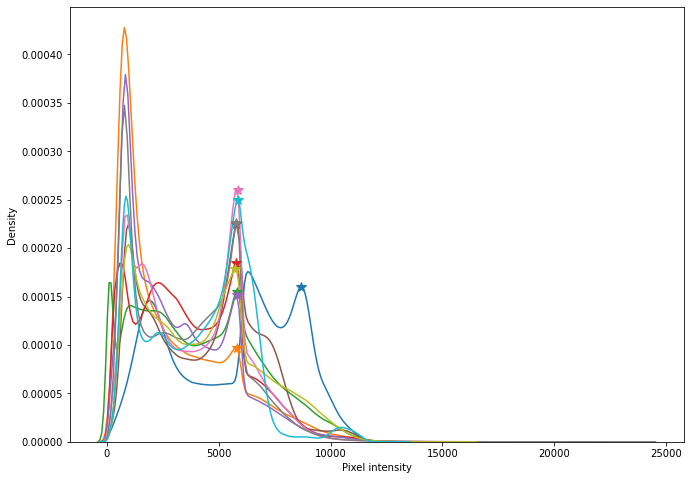

In [726]:
min_p_new, max_p_new, bimodals_new, max_i_new, min_i_new = landmarks(new_pixels, 0, 99.8)

## Reconstruct images

In [727]:
def reconstruct_image_array(array, image_size):
    
    im = np.reshape(array, image_size)
    im = im.astype(int)
    #im = sitk.GetImageFromArray(im)
    
    return im

In [728]:
def reconstruct_images(array, image_size):
    
    images = []
    
    for i in range(len(array)):
        images.append(reconstruct_image_array(array[i], image_size[i]))
    
    return images

In [729]:
im_before = reconstruct_images(pixel_values_trans, img_sizes_trans)
im_after = reconstruct_images(new_pixels, img_sizes_trans)
print(len(im_before))

10


In [730]:
def plot_single_image(ax, img):
    """
    Plots a single image and contour.
    """
    #plt.figure()
    #ax = plt.subplot(111)
    ax.imshow(img, 'gray')#, vmin=0, vmax=1)
    ax.axis('off')
    #ax.contour(contour[0][..., 0], 1, levels=[0.5], colors='yellow')
    #plt.show()

In [739]:
def plot_images(images_b, images_a, slice_number):    
    """
    Plots 4 single images with contours.
    """
    plt.figure(figsize=(15,15))
    for i in range(4):
        ax = plt.subplot(4, 2, 2*i+1)
        plot_single_image(ax, images_b[i][slice_number])#[..., 0], targets[i])
        
        ax = plt.subplot(4, 2, 2*i+2)
        plot_single_image(ax, images_a[i][slice_number])#[..., 1], targets[i])

    plt.show()

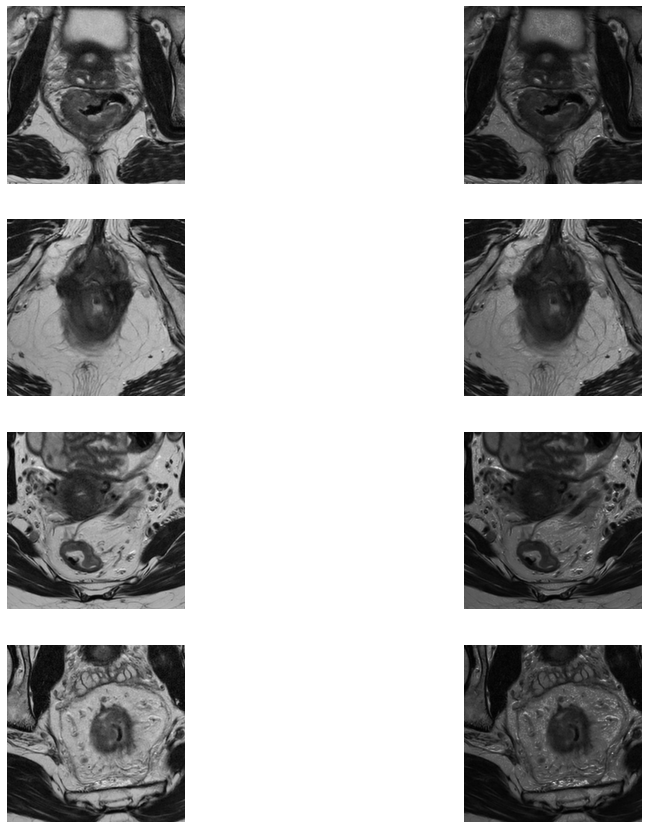

In [740]:
before = im_before[4:8]
after = im_after[4:8]
plot_images(before, after, 12)